<a href="https://colab.research.google.com/github/kde9867/SW/blob/main/%EC%8B%AC%EB%A6%AC_%EC%84%B1%ED%96%A5_%EC%98%88%EC%B8%A1%EC%9D%84_%EC%9C%84%ED%95%9C_LGBM_BASELINE_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd

#시각화에 필요한 라이브러리 임포트
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#내부에 결과를 출력하도록 설정
%matplotlib inline

#시각화 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

#머신러닝
import xgboost as xgb
from xgboost import XGBClassifier

#분석에 문제가 없는 경고 메세지는 숨김.
import warnings
warnings.filterwarnings('ignore')

In [15]:
train = pd.read_csv('county_dum_and_dropna (1).csv')
test  = pd.read_csv('test.csv')

In [16]:
traindata = train.copy()
print(traindata.keys())

Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'introelapse', 'testelapse',
       'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4',
       'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12',
       'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender',
       'engnat', 'age', 'hand', 'religion', 'orientation', 'voted', 'married',
       'familysize', 'ASD', 'nerdiness', 'country'],
      dtype='object')


In [17]:
print(traindata.shape)

(12796, 70)


In [18]:
import pandas as pd

data = pd.DataFrame(traindata)
data.columns = traindata.keys()
data.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,country
0,0,1,5,5,5,1,4,5,5,1,...,20,2,12,4,2,1,4,2,1,130
1,1,4,4,4,4,4,5,4,4,3,...,49,1,2,1,1,2,4,2,1,130
2,2,4,5,5,4,3,5,5,5,4,...,43,1,2,2,2,3,4,2,1,94
3,3,4,4,4,2,4,3,3,5,3,...,17,2,1,1,2,1,2,2,1,130
4,4,4,4,4,4,3,3,4,2,3,...,18,2,12,1,2,1,1,2,0,64


In [19]:
target = 'nerdiness'

In [20]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12796 entries, 0 to 12795
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   index         12796 non-null  int64
 1   Q1            12796 non-null  int64
 2   Q2            12796 non-null  int64
 3   Q3            12796 non-null  int64
 4   Q4            12796 non-null  int64
 5   Q5            12796 non-null  int64
 6   Q6            12796 non-null  int64
 7   Q7            12796 non-null  int64
 8   Q8            12796 non-null  int64
 9   Q9            12796 non-null  int64
 10  Q10           12796 non-null  int64
 11  Q11           12796 non-null  int64
 12  Q12           12796 non-null  int64
 13  Q13           12796 non-null  int64
 14  Q14           12796 non-null  int64
 15  Q15           12796 non-null  int64
 16  Q16           12796 non-null  int64
 17  Q17           12796 non-null  int64
 18  Q18           12796 non-null  int64
 19  Q19           12796 non-n

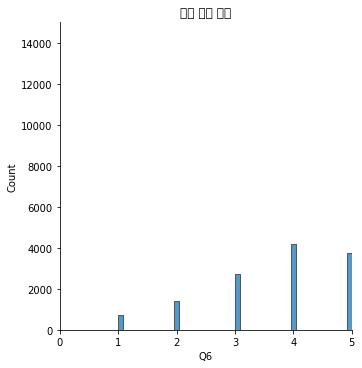

In [21]:
sns.displot(traindata['Q6'],kde=False, bins=50)
plt.axis([0, 5, 0, 15000])
plt.title("질문 답변 분포")
plt.show()

In [22]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,country
0,0,1,5,5,5,1,4,5,5,1,...,20,2,12,4,2,1,4,2,1,130
1,1,4,4,4,4,4,5,4,4,3,...,49,1,2,1,1,2,4,2,1,130
2,2,4,5,5,4,3,5,5,5,4,...,43,1,2,2,2,3,4,2,1,94
3,3,4,4,4,2,4,3,3,5,3,...,17,2,1,1,2,1,2,2,1,130
4,4,4,4,4,4,3,3,4,2,3,...,18,2,12,1,2,1,1,2,0,64


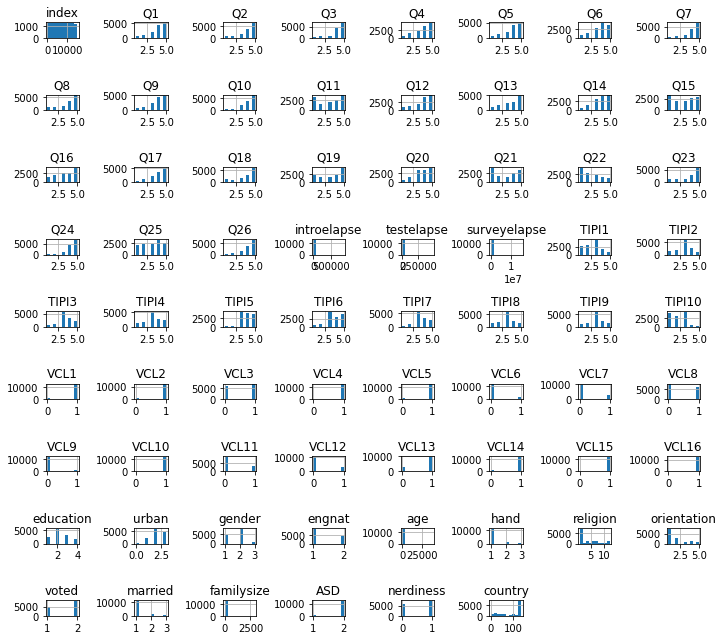

In [23]:
train.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

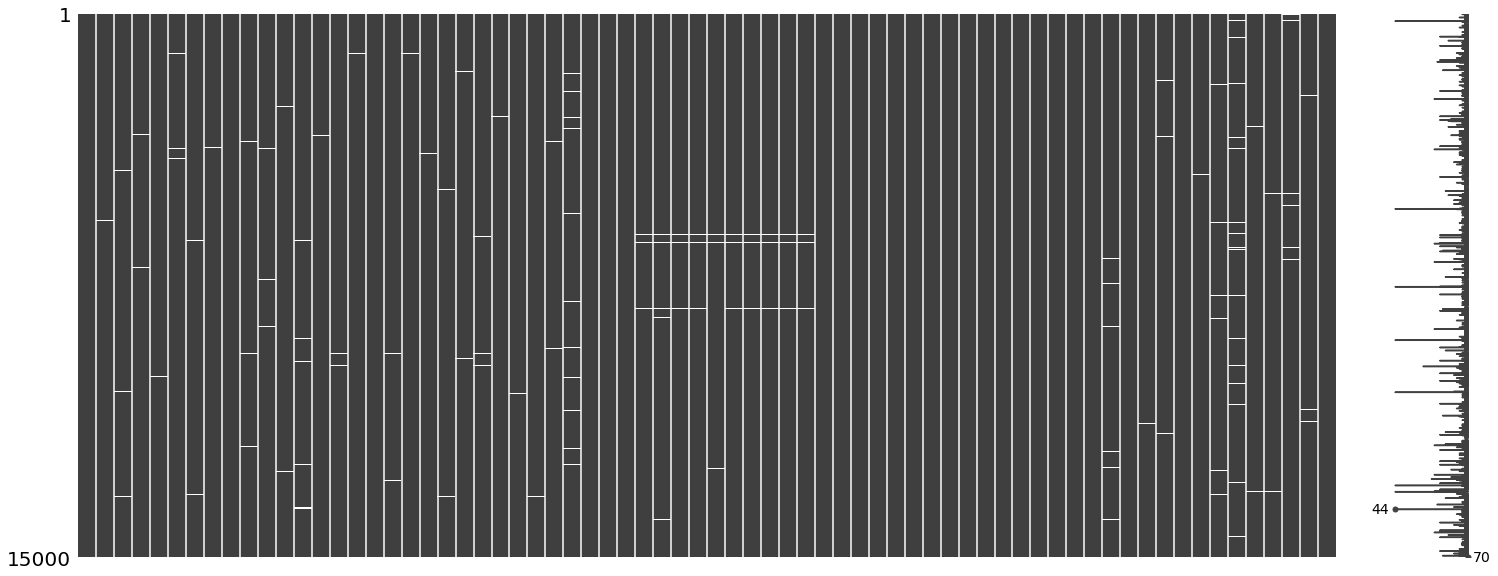

In [ ]:
df = pd.read_csv('train.csv', dtype={"A": pd.Int64Dtype()}, parse_dates=[3])
msno.matrix(df)
plt.show()

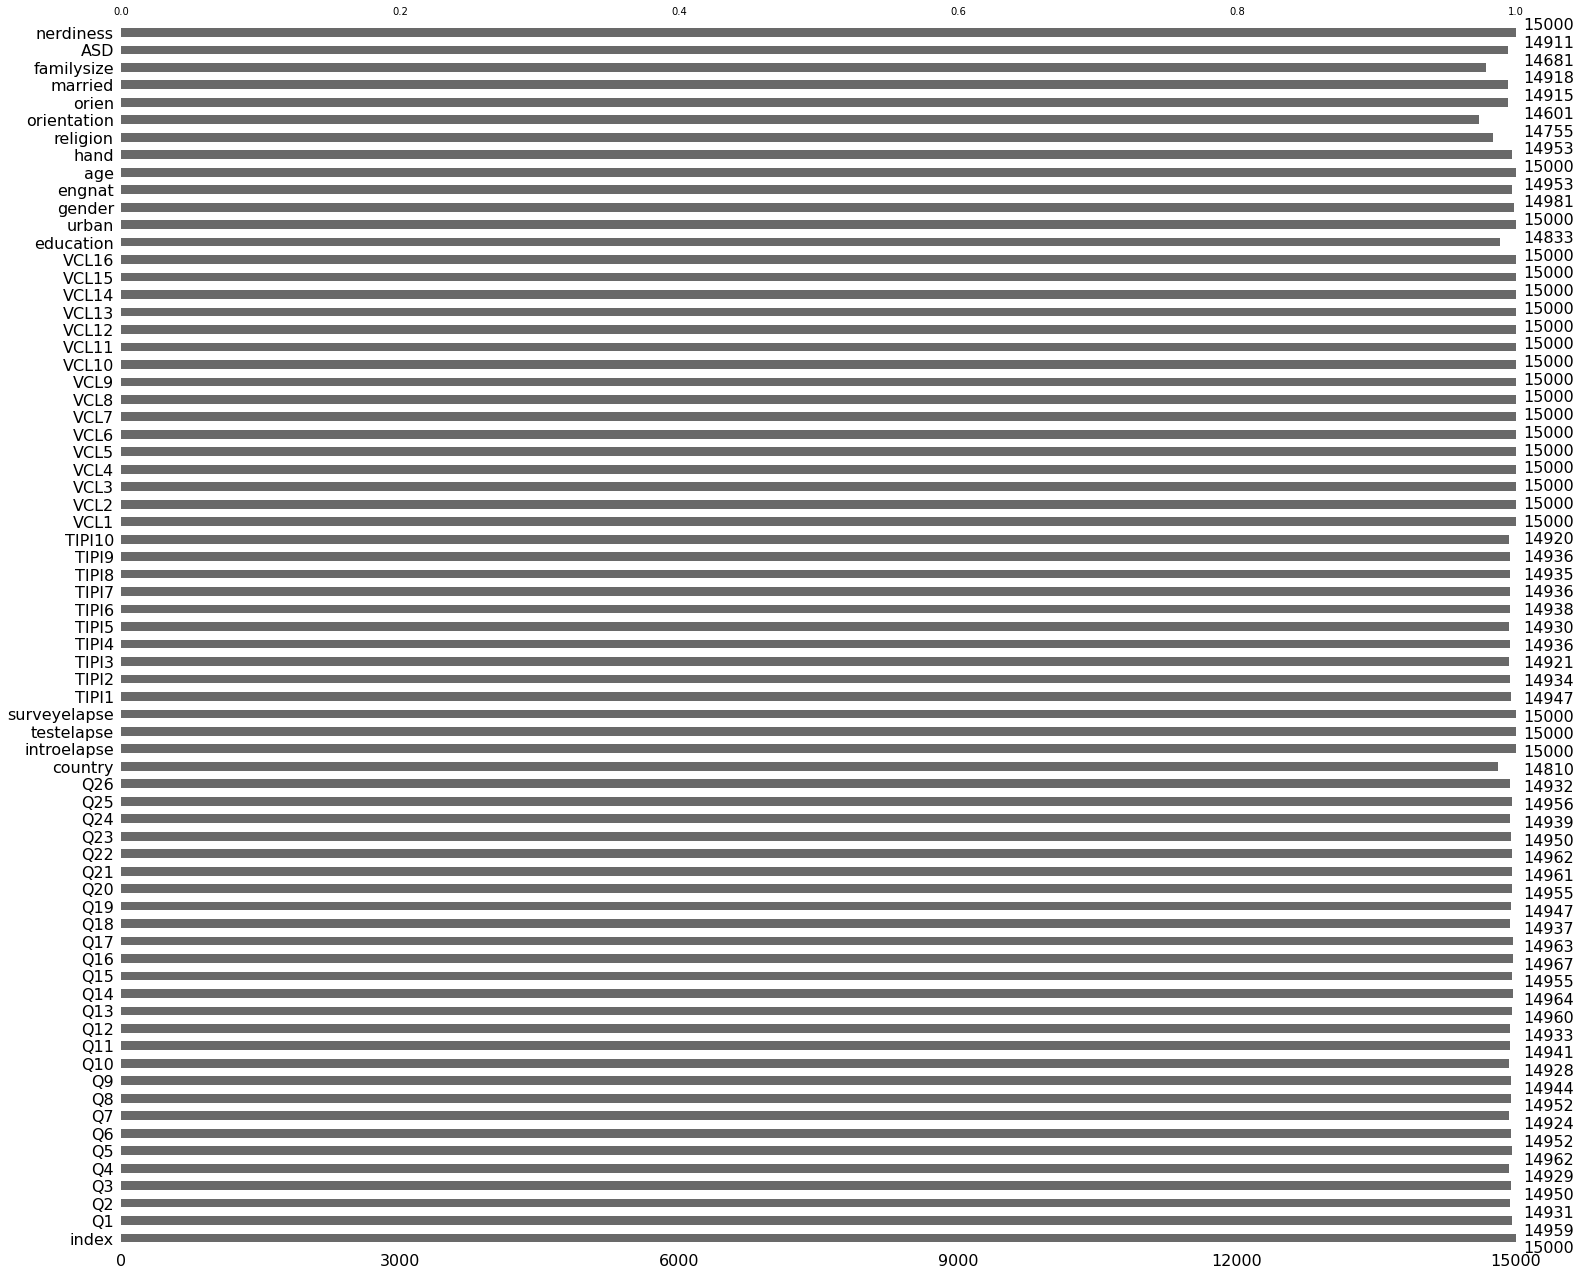

In [ ]:
msno.bar(df)
plt.show()

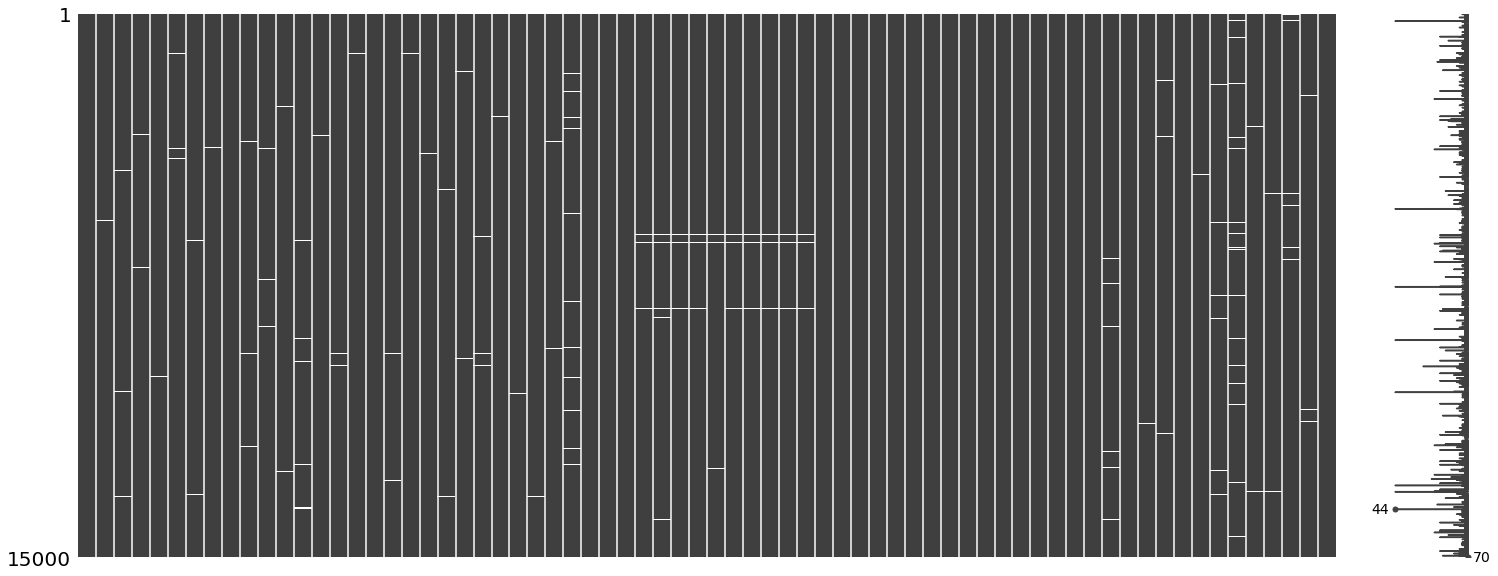

In [ ]:
df.fillna(0)
msno.matrix(df)
plt.show()


In [ ]:
sns.displot(traindata['Q1~26'], kde=False, bins=50)
plt.axis([0, 50, 0, ])

KeyError: ignored

In [ ]:
raw = pd.read_csv('county_dum_and_dropna (1).csv')
raw.corr()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,country
index,1.000000,0.000450,-0.008411,-0.007545,-0.001189,0.009884,0.005317,-0.001693,0.001747,0.007333,...,0.003435,-0.002794,0.005513,0.008258,0.002698,0.006958,-0.013406,-0.013940,0.009897,-0.013110
Q1,0.000450,1.000000,0.187795,0.377656,0.576809,0.225523,0.166752,0.106837,0.323378,0.172941,...,0.002328,0.026008,-0.000326,0.156099,0.078736,-0.139941,0.006202,-0.117180,0.290291,0.007232
Q2,-0.008411,0.187795,1.000000,0.145473,0.191724,0.173225,0.147065,0.345485,0.246302,0.194986,...,-0.009800,0.047640,-0.028793,0.069865,-0.016765,-0.024412,0.006294,-0.031973,0.267388,-0.003693
Q3,-0.007545,0.377656,0.145473,1.000000,0.332286,0.145413,0.193666,0.076621,0.352121,0.082157,...,-0.033216,0.010356,-0.033025,0.152797,0.061323,-0.112973,0.006122,-0.090341,0.201148,0.022157
Q4,-0.001189,0.576809,0.191724,0.332286,1.000000,0.270218,0.215022,0.126343,0.263971,0.211404,...,0.005287,0.046891,-0.014313,0.180428,0.025791,-0.081011,0.007716,-0.168834,0.268228,0.035625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
married,0.006958,-0.139941,-0.024412,-0.112973,-0.081011,0.061417,0.046239,0.065334,-0.119591,0.048168,...,0.017037,0.000330,0.042171,-0.149912,-0.195429,1.000000,0.001147,0.043025,-0.021366,0.052572
familysize,-0.013406,0.006202,0.006294,0.006122,0.007716,0.007136,0.009879,0.005959,0.006475,0.008025,...,0.002185,0.033410,0.019382,0.021733,-0.011722,0.001147,1.000000,-0.033907,-0.011637,0.011168
ASD,-0.013940,-0.117180,-0.031973,-0.090341,-0.168834,-0.078905,-0.041696,-0.021721,-0.052418,-0.038230,...,0.003664,-0.032590,-0.006595,-0.092158,-0.008220,0.043025,-0.033907,1.000000,-0.054374,-0.000645
nerdiness,0.009897,0.290291,0.267388,0.201148,0.268228,0.237681,0.308301,0.205133,0.229419,0.226629,...,0.006273,0.014804,-0.037217,0.070366,-0.017562,-0.021366,-0.011637,-0.054374,1.000000,0.040752


In [ ]:
df = raw.corr()
df

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,country
index,1.000000,0.000450,-0.008411,-0.007545,-0.001189,0.009884,0.005317,-0.001693,0.001747,0.007333,...,0.003435,-0.002794,0.005513,0.008258,0.002698,0.006958,-0.013406,-0.013940,0.009897,-0.013110
Q1,0.000450,1.000000,0.187795,0.377656,0.576809,0.225523,0.166752,0.106837,0.323378,0.172941,...,0.002328,0.026008,-0.000326,0.156099,0.078736,-0.139941,0.006202,-0.117180,0.290291,0.007232
Q2,-0.008411,0.187795,1.000000,0.145473,0.191724,0.173225,0.147065,0.345485,0.246302,0.194986,...,-0.009800,0.047640,-0.028793,0.069865,-0.016765,-0.024412,0.006294,-0.031973,0.267388,-0.003693
Q3,-0.007545,0.377656,0.145473,1.000000,0.332286,0.145413,0.193666,0.076621,0.352121,0.082157,...,-0.033216,0.010356,-0.033025,0.152797,0.061323,-0.112973,0.006122,-0.090341,0.201148,0.022157
Q4,-0.001189,0.576809,0.191724,0.332286,1.000000,0.270218,0.215022,0.126343,0.263971,0.211404,...,0.005287,0.046891,-0.014313,0.180428,0.025791,-0.081011,0.007716,-0.168834,0.268228,0.035625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
married,0.006958,-0.139941,-0.024412,-0.112973,-0.081011,0.061417,0.046239,0.065334,-0.119591,0.048168,...,0.017037,0.000330,0.042171,-0.149912,-0.195429,1.000000,0.001147,0.043025,-0.021366,0.052572
familysize,-0.013406,0.006202,0.006294,0.006122,0.007716,0.007136,0.009879,0.005959,0.006475,0.008025,...,0.002185,0.033410,0.019382,0.021733,-0.011722,0.001147,1.000000,-0.033907,-0.011637,0.011168
ASD,-0.013940,-0.117180,-0.031973,-0.090341,-0.168834,-0.078905,-0.041696,-0.021721,-0.052418,-0.038230,...,0.003664,-0.032590,-0.006595,-0.092158,-0.008220,0.043025,-0.033907,1.000000,-0.054374,-0.000645
nerdiness,0.009897,0.290291,0.267388,0.201148,0.268228,0.237681,0.308301,0.205133,0.229419,0.226629,...,0.006273,0.014804,-0.037217,0.070366,-0.017562,-0.021366,-0.011637,-0.054374,1.000000,0.040752


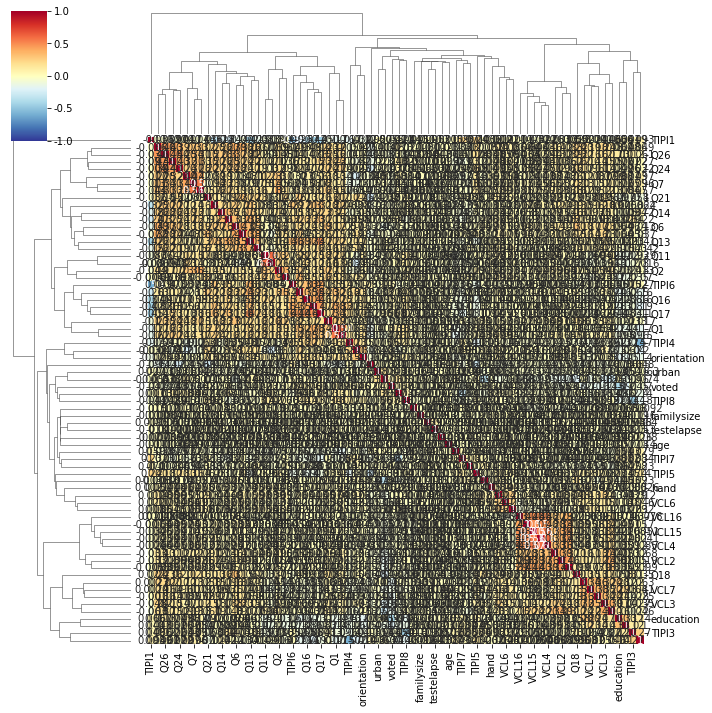

In [ ]:
df = raw.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 200, learning_rate = 0.1, random_state = 2000)
xgb.fit(train[input_var], train['result_pts'])

test_xgb = test.copy()
test_xgb['result_P'] = xgb.predict(test_xgb[input_var])
test_xgb
mse_xgb = mean_squared_error(test_xgb['result_pts'],test_xgb['result_P'])
mse_xgb

NameError: ignored

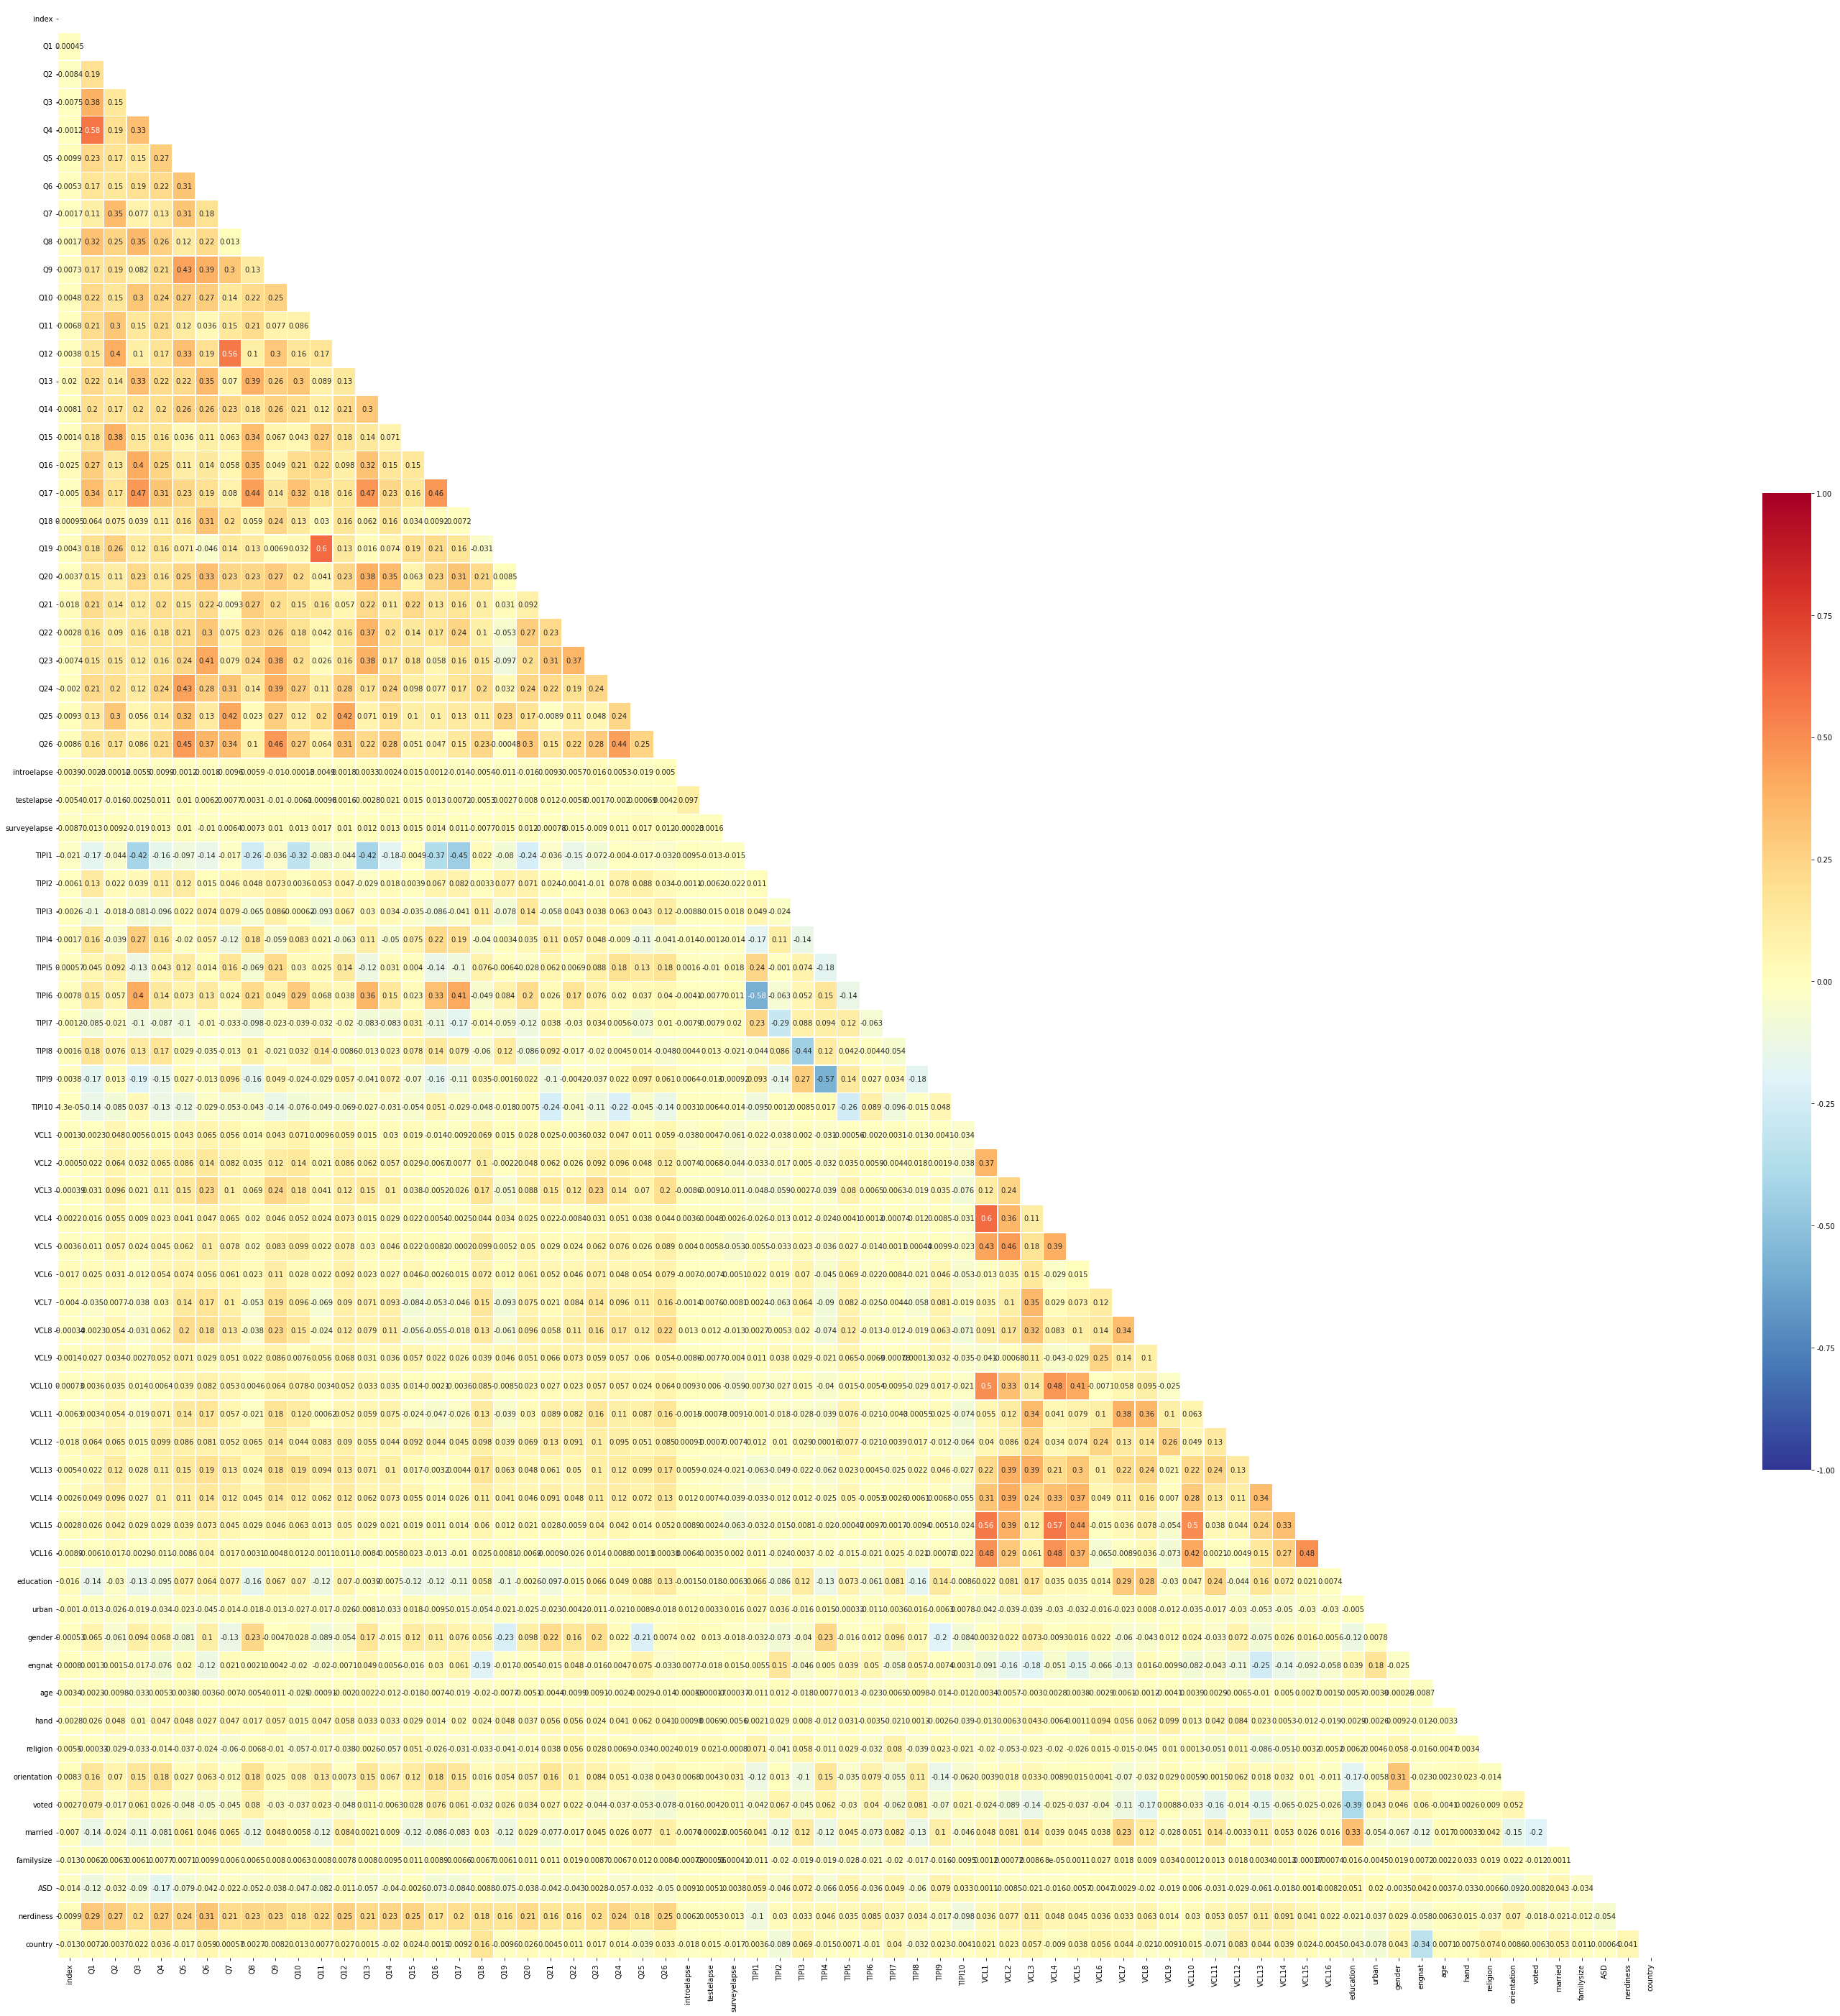

In [ ]:
df = raw.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(50,50) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

# 모델링 

In [ ]:
train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)

NameError: ignored

In [ ]:
#train을 target과 feature로 나눠줍니다.
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [ ]:
lgbm_clf = LGBMClassifier(
            n_estimators=1000
        )
lgbm_clf.fit(train_x, train_y)

lgbm_pred = lgbm_clf.predict(test)

# 제출 파일 생성

In [ ]:
submission = pd.read_csv('sample_submission.csv')

submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [ ]:
submission["nerdiness"] = lgbm_pred

In [ ]:
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [ ]:
submission.to_csv("baseline.csv", index = False)